In [17]:
import pickle
import networkx as nx

# Charger et inspecter le pickle
pickle_path = "../data/vectorized_graph/vectorized_graph.pkl"

with open(pickle_path, 'rb') as f:
    loaded_data = pickle.load(f)

print(" CONTENU DU PICKLE :")
print(f"Type : {type(loaded_data)}")


 CONTENU DU PICKLE :
Type : <class 'networkx.classes.multidigraph.MultiDiGraph'>


In [18]:
if isinstance(loaded_data, nx.Graph):
    print(" C'est un graphe NetworkX")
    print(f"Nœuds : {loaded_data.number_of_nodes()}")
    print(f"Arêtes : {loaded_data.number_of_edges()}")
    
    # Regarder 3 nœuds
    print("\n EXEMPLES DE NŒUDS :")
    for i, (node_id, attrs) in enumerate(list(loaded_data.nodes(data=True))[:3]):
        print(f"Nœud {node_id} : {attrs}")
    
    # Regarder 3 arêtes  
    print("\n EXEMPLES D'ARÊTES :")
    for i, (u, v, attrs) in enumerate(list(loaded_data.edges(data=True))[:3]):
        print(f"Arête {u}→{v} : {attrs}")

else:
    print(" Ce n'est pas un graphe NetworkX")
    print(f"Contenu : {loaded_data}")

 C'est un graphe NetworkX
Nœuds : 145341
Arêtes : 678839

 EXEMPLES DE NŒUDS :
Nœud 0 : {'label': '', 'node_type': 1, 'packet_id': 0, 'embedding': array([0.05  , 0.    , 0.05  , 0.5   , 0.    , 0.1   , 1.    , 0.1226,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.05  , 0.    ,
       0.05  , 0.1   , 0.5   , 0.    , 1.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
      dtype=float32), 'entity_type': 'TEXT', 'classification_confidence': 0.3}
Nœud 1 : {'label': '10.100.200.16', 'node_type': 2, 'packet_id': 0, 'embedding': array([ 0.03921569,  0.39215687,  0.78431374,  0.0627451 ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.031

In [19]:
# Vérifier l'état actuel
sample_node = list(loaded_data.nodes(data=True))[0]
print(f"Attributs du nœud: {sample_node[1].keys()}")

has_embeddings = 'embedding' in sample_node[1]  
has_x_features = 'x' in sample_node[1]

print(f"A déjà des embeddings: {has_embeddings}")
print(f"A déjà des features x: {has_x_features}")

Attributs du nœud: dict_keys(['label', 'node_type', 'packet_id', 'embedding', 'entity_type', 'classification_confidence'])
A déjà des embeddings: True
A déjà des features x: False


In [20]:
# Analyser vos embeddings existants
sample_node = list(loaded_data.nodes(data=True))[0]
print(f"Dimension des embeddings: {len(sample_node[1]['embedding'])}")
print(f"Type d'entité détecté: {sample_node[1]['entity_type']}")
print(f"Confiance: {sample_node[1]['classification_confidence']}")

# Statistiques globales
entity_types = {}
confidences = []

for node_id, attrs in loaded_data.nodes(data=True):
    entity_type = attrs.get('entity_type', 'unknown')
    confidence = attrs.get('classification_confidence', 0)
    
    entity_types[entity_type] = entity_types.get(entity_type, 0) + 1
    confidences.append(confidence)

print(f"\n=== STATISTIQUES DES EMBEDDINGS EXISTANTS ===")
print("Types d'entités détectés:")
for entity_type, count in sorted(entity_types.items(), key=lambda x: x[1], reverse=True):
    print(f"  {entity_type}: {count:,} nœuds")

print(f"\nConfiance moyenne: {sum(confidences)/len(confidences):.3f}")
print(f"Confiance min/max: {min(confidences):.3f} / {max(confidences):.3f}")

Dimension des embeddings: 64
Type d'entité détecté: TEXT
Confiance: 0.3

=== STATISTIQUES DES EMBEDDINGS EXISTANTS ===
Types d'entités détectés:
  TEXT: 143,144 nœuds
  HTTP_PATH: 986 nœuds
  TELECOM_CODE: 617 nœuds
  IP_ADDRESS: 441 nœuds
  UUID: 109 nœuds
  SERVICE_5G: 19 nœuds
  NF_TYPE: 10 nœuds
  FQDN: 8 nœuds
  HTTP_METHOD: 5 nœuds
  TOKEN_TYPE: 1 nœuds
  STATUS: 1 nœuds

Confiance moyenne: 0.307
Confiance min/max: 0.300 / 0.950


In [21]:
#  Analyser les premiers nœuds
print("=== ANALYSE DES PREMIERS NŒUDS ===")
for i, (node_id, node_data) in enumerate(loaded_data.nodes(data=True)):
    if i >= 5:  # Regarder juste les 5 premiers
        break
    
    print(f"\nNœud {node_id}:")
    print(f"  Attributs: {list(node_data.keys())}")
    
    # Vérifier embedding
    if 'embedding' in node_data:
        embedding = node_data['embedding']
        print(f"   HAS embedding: shape={embedding.shape if hasattr(embedding, 'shape') else 'unknown'}")
        print(f"     Type: {type(embedding)}")
        print(f"     Premiers éléments: {embedding[:5] if hasattr(embedding, '__getitem__') else embedding}")
    else:
        print(f"   NO embedding")
        print(f"  Tous les attributs: {node_data}")

=== ANALYSE DES PREMIERS NŒUDS ===

Nœud 0:
  Attributs: ['label', 'node_type', 'packet_id', 'embedding', 'entity_type', 'classification_confidence']
   HAS embedding: shape=(64,)
     Type: <class 'numpy.ndarray'>
     Premiers éléments: [0.05 0.   0.05 0.5  0.  ]

Nœud 1:
  Attributs: ['label', 'node_type', 'packet_id', 'embedding', 'entity_type', 'classification_confidence']
   HAS embedding: shape=(64,)
     Type: <class 'numpy.ndarray'>
     Premiers éléments: [0.03921569 0.39215687 0.78431374 0.0627451  1.        ]

Nœud 2:
  Attributs: ['label', 'node_type', 'packet_id', 'embedding', 'entity_type', 'classification_confidence']
   HAS embedding: shape=(64,)
     Type: <class 'numpy.ndarray'>
     Premiers éléments: [0.03921569 0.39215687 0.78431374 0.01568628 1.        ]

Nœud 3:
  Attributs: ['label', 'node_type', 'packet_id', 'embedding', 'entity_type', 'classification_confidence']
   HAS embedding: shape=(64,)
     Type: <class 'numpy.ndarray'>
     Premiers éléments: [0. 0. 0

In [22]:
print("\n=== STATISTIQUES COMPLÈTES ===")

nodes_with_embedding = 0
nodes_without_embedding = []
embedding_shapes = {}

for node_id, node_data in loaded_data.nodes(data=True):
    if 'embedding' in node_data:
        nodes_with_embedding += 1
        embedding = node_data['embedding']
        shape = embedding.shape if hasattr(embedding, 'shape') else str(type(embedding))
        if shape not in embedding_shapes:
            embedding_shapes[shape] = 0
        embedding_shapes[shape] += 1
    else:
        nodes_without_embedding.append(node_id)

print(f"Nœuds AVEC embedding: {nodes_with_embedding}")
print(f"Nœuds SANS embedding: {len(nodes_without_embedding)}")

if nodes_without_embedding:
    print(f"IDs des nœuds sans embedding (premiers 10): {nodes_without_embedding[:10]}")

print(f"Formes des embeddings trouvés: {embedding_shapes}")


=== STATISTIQUES COMPLÈTES ===
Nœuds AVEC embedding: 145341
Nœuds SANS embedding: 0
Formes des embeddings trouvés: {(64,): 145341}


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# ========================================
# ANALYSE DES ARÊTES (suite logique)
# ========================================

print("\n=== ANALYSE DES ARÊTES ===")
edges_with_embedding = 0
edges_without_embedding = []
edge_entity_types = {}
edge_confidences = []

for u, v, edge_data in loaded_data.edges(data=True):
    if 'embedding' in edge_data:
        edges_with_embedding += 1
        entity_type = edge_data.get('entity_type', 'unknown')
        confidence = edge_data.get('classification_confidence', 0)
        
        edge_entity_types[entity_type] = edge_entity_types.get(entity_type, 0) + 1
        edge_confidences.append(confidence)
    else:
        edges_without_embedding.append((u, v))

print(f"Arêtes AVEC embedding: {edges_with_embedding}")
print(f"Arêtes SANS embedding: {len(edges_without_embedding)}")

if edges_with_embedding > 0:
    print("\nTypes d'arêtes détectés:")
    for entity_type, count in sorted(edge_entity_types.items(), key=lambda x: x[1], reverse=True):
        print(f"  {entity_type}: {count:,} arêtes")
    
    print(f"\nConfiance moyenne arêtes: {sum(edge_confidences)/len(edge_confidences):.3f}")
    print(f"Confiance min/max arêtes: {min(edge_confidences):.3f} / {max(edge_confidences):.3f}")



=== ANALYSE DES ARÊTES ===
Arêtes AVEC embedding: 678839
Arêtes SANS embedding: 0

Types d'arêtes détectés:
  NETWORK_FLOW: 162,000 arêtes
  GENERIC_RELATION: 118,825 arêtes
  JWT_SECURITY: 104,284 arêtes
  TEMPORAL: 81,000 arêtes
  HTTP_PROTOCOL: 72,796 arêtes
  HIERARCHICAL_RELATION: 60,151 arêtes
  NF_RELATION: 32,496 arêtes
  SERVICE_RELATION: 31,257 arêtes
  CONFIGURATION: 16,030 arêtes

Confiance moyenne arêtes: 0.792
Confiance min/max arêtes: 0.300 / 0.950


In [24]:
# ========================================
# VALIDATION SÉMANTIQUE DES IP
# ========================================

print("\n=== VALIDATION SÉMANTIQUE: ADRESSES IP ===")

# Extraire toutes les adresses IP
ip_nodes = []
for node_id, attrs in loaded_data.nodes(data=True):
    if attrs.get('entity_type') == 'IP_ADDRESS' and 'embedding' in attrs:
        ip_nodes.append((node_id, attrs['label'], attrs['embedding']))

print(f"Nombre d'adresses IP trouvées: {len(ip_nodes)}")

if len(ip_nodes) >= 5:
    # Afficher quelques exemples
    print("\nExemples d'adresses IP:")
    for i, (node_id, ip_label, embedding) in enumerate(ip_nodes[:5]):
        print(f"  Nœud {node_id}: {ip_label}")
        print(f"    Embedding shape: {embedding.shape}")
        print(f"    Premiers éléments: {embedding[:8]}")
    
    # Test de cohérence par sous-réseau
    subnet_groups = defaultdict(list)
    for node_id, ip_label, embedding in ip_nodes[:20]:  # Limiter pour performance
        try:
            # Extraire les 3 premiers octets
            octets = ip_label.split('.')
            if len(octets) == 4:
                subnet = '.'.join(octets[:3])
                subnet_groups[subnet].append((node_id, ip_label, embedding))
        except:
            continue
    
    print(f"\nSous-réseaux détectés: {len(subnet_groups)}")
    
    # Tester la similarité intra-subnet
    print("\nTest de cohérence par sous-réseau:")
    for subnet, ips in list(subnet_groups.items())[:3]:
        if len(ips) >= 2:
            embeddings = np.array([ip[2] for ip in ips])
            similarities = cosine_similarity(embeddings)
            
            # Calculer similarité moyenne (exclure diagonale)
            mask = ~np.eye(similarities.shape[0], dtype=bool)
            avg_similarity = np.mean(similarities[mask])
            
            print(f"  {subnet}.x ({len(ips)} IPs):")
            print(f"    Similarité moyenne: {avg_similarity:.4f}")
            
            # Afficher la matrice pour les petits groupes
            if len(ips) <= 3:
                for i, (_, ip1, _) in enumerate(ips):
                    for j, (_, ip2, _) in enumerate(ips):
                        if i < j:
                            sim = similarities[i, j]
                            print(f"    {ip1} ↔ {ip2}: {sim:.4f}")


=== VALIDATION SÉMANTIQUE: ADRESSES IP ===
Nombre d'adresses IP trouvées: 441

Exemples d'adresses IP:
  Nœud 1: 10.100.200.16
    Embedding shape: (64,)
    Premiers éléments: [0.03921569 0.39215687 0.78431374 0.0627451  1.         0.
 0.         0.        ]
  Nœud 2: 10.100.200.4
    Embedding shape: (64,)
    Premiers éléments: [0.03921569 0.39215687 0.78431374 0.01568628 1.         0.
 0.         0.        ]
  Nœud 41: 10.100.200.6
    Embedding shape: (64,)
    Premiers éléments: [0.03921569 0.39215687 0.78431374 0.02352941 1.         0.
 0.         0.        ]
  Nœud 79: 10.100.200.10
    Embedding shape: (64,)
    Premiers éléments: [0.03921569 0.39215687 0.78431374 0.03921569 1.         0.
 0.         0.        ]
  Nœud 106: 10.100.200.7
    Embedding shape: (64,)
    Premiers éléments: [0.03921569 0.39215687 0.78431374 0.02745098 1.         0.
 0.         0.        ]

Sous-réseaux détectés: 3

Test de cohérence par sous-réseau:
  10.100.200.x (12 IPs):
    Similarité moyenne:

In [25]:
# ========================================
# ANALYSE DES EMBEDDINGS TEMPORELS
# ========================================

print("\n=== ANALYSE DES DONNÉES TEMPORELLES ===")

temporal_edges = []
for u, v, attrs in loaded_data.edges(data=True):
    if attrs.get('entity_type') == 'TEMPORAL' and 'embedding' in attrs:
        temporal_edges.append((u, v, attrs['label'], attrs['embedding']))

print(f"Arêtes temporelles trouvées: {len(temporal_edges)}")

if len(temporal_edges) > 0:
    print("\nExemples d'arêtes temporelles:")
    for i, (u, v, label, embedding) in enumerate(temporal_edges[:3]):
        print(f"  Arête {u}→{v}: {label}")
        print(f"    Embedding shape: {embedding.shape}")
        print(f"    Sparsité: {np.mean(embedding == 0):.3f}")
        print(f"    Valeurs non-nulles: {np.sum(embedding != 0)}")
        
        # Trouver les positions des valeurs non-nulles
        non_zero_positions = np.where(embedding != 0)[0]
        if len(non_zero_positions) > 0:
            print(f"    Positions actives: {non_zero_positions[:5]}")


=== ANALYSE DES DONNÉES TEMPORELLES ===
Arêtes temporelles trouvées: 81000

Exemples d'arêtes temporelles:
  Arête 0→3: ts
    Embedding shape: (64,)
    Sparsité: 0.219
    Valeurs non-nulles: 50
    Positions actives: [ 0 14 16 17 18]
  Arête 6→7: ts
    Embedding shape: (64,)
    Sparsité: 0.219
    Valeurs non-nulles: 50
    Positions actives: [ 0 14 16 17 18]
  Arête 9→10: ts
    Embedding shape: (64,)
    Sparsité: 0.219
    Valeurs non-nulles: 50
    Positions actives: [ 0 14 16 17 18]


In [26]:
# ========================================
# ANALYSE DES STRUCTURES HIÉRARCHIQUES
# ========================================

print("\n=== ANALYSE DES STRUCTURES HIÉRARCHIQUES ===")

hierarchical_edges = []
for u, v, attrs in loaded_data.edges(data=True):
    label = attrs.get('label', '')
    if '[' in label and ']' in label and 'embedding' in attrs:
        hierarchical_edges.append((u, v, label, attrs['embedding']))

print(f"Arêtes hiérarchiques trouvées: {len(hierarchical_edges)}")

if len(hierarchical_edges) > 0:
    print("\nExemples d'arêtes hiérarchiques:")
    for i, (u, v, label, embedding) in enumerate(hierarchical_edges[:5]):
        print(f"  Arête {u}→{v}: {label}")
    
    # Grouper par instance pour tester la cohérence
    instance_groups = defaultdict(list)
    for u, v, label, embedding in hierarchical_edges[:20]:
        try:
            # Extraire la partie avant le premier [
            if '[' in label:
                instance_key = label.split('[')[0]
                # Extraire aussi l'index si possible
                if ']' in label:
                    bracket_content = label.split('[')[1].split(']')[0]
                    instance_key = f"{instance_key}[{bracket_content}]"
                
                instance_groups[instance_key].append((label, embedding))
        except:
            continue
    
    print(f"\nGroupes d'instances détectés: {len(instance_groups)}")
    
    # Test de cohérence par instance
    print("\nTest de cohérence par instance:")
    for instance_key, attributes in list(instance_groups.items())[:3]:
        if len(attributes) >= 2:
            embeddings = np.array([attr[1] for attr in attributes])
            similarities = cosine_similarity(embeddings)
            
            mask = ~np.eye(similarities.shape[0], dtype=bool)
            avg_similarity = np.mean(similarities[mask])
            
            print(f"  {instance_key} ({len(attributes)} attributs):")
            print(f"    Similarité moyenne: {avg_similarity:.4f}")
            
            # Lister les attributs
            for label, _ in attributes:
                print(f"    - {label}")



=== ANALYSE DES STRUCTURES HIÉRARCHIQUES ===
Arêtes hiérarchiques trouvées: 113983

Exemples d'arêtes hiérarchiques:
  Arête 9→65: snssais[0].sst
  Arête 9→206: snssais[0].sd
  Arête 9→29: target-plmn-list[0].mcc
  Arête 9→30: target-plmn-list[0].mnc
  Arête 17→22: nfInstances[0].nfType

Groupes d'instances détectés: 3

Test de cohérence par instance:
  snssais[0] (4 attributs):
    Similarité moyenne: 0.9991
    - snssais[0].sst
    - snssais[0].sd
    - snssais[0].sst
    - snssais[0].sd
  target-plmn-list[0] (4 attributs):
    Similarité moyenne: 1.0000
    - target-plmn-list[0].mcc
    - target-plmn-list[0].mnc
    - target-plmn-list[0].mcc
    - target-plmn-list[0].mnc
  nfInstances[0] (12 attributs):
    Similarité moyenne: 0.6442
    - nfInstances[0].nfType
    - nfInstances[0].nfInstanceId
    - nfInstances[0].nfServices[0].serviceInstanceId
    - nfInstances[0].nfStatus
    - nfInstances[0].nfServices[0].nfServiceStatus
    - nfInstances[0].plmnList[0].mcc
    - nfInstances[0

In [27]:
# ========================================
# STATISTIQUES DIMENSIONNELLES
# ========================================

print("\n=== STATISTIQUES DIMENSIONNELLES ===")

# Analyser la distribution des valeurs dans les embeddings
all_node_embeddings = []
all_edge_embeddings = []

for node_id, attrs in loaded_data.nodes(data=True):
    if 'embedding' in attrs:
        all_node_embeddings.append(attrs['embedding'])

for u, v, attrs in loaded_data.edges(data=True):
    if 'embedding' in attrs:
        all_edge_embeddings.append(attrs['embedding'])

if all_node_embeddings:
    node_embeddings_matrix = np.array(all_node_embeddings)
    print(f"\nEmbeddings des nœuds:")
    print(f"  Shape: {node_embeddings_matrix.shape}")
    print(f"  Moyenne globale: {np.mean(node_embeddings_matrix):.4f}")
    print(f"  Écart-type global: {np.std(node_embeddings_matrix):.4f}")
    print(f"  Sparsité globale: {np.mean(node_embeddings_matrix == 0):.4f}")
    print(f"  Min/Max: {np.min(node_embeddings_matrix):.4f} / {np.max(node_embeddings_matrix):.4f}")

if all_edge_embeddings:
    edge_embeddings_matrix = np.array(all_edge_embeddings)
    print(f"\nEmbeddings des arêtes:")
    print(f"  Shape: {edge_embeddings_matrix.shape}")
    print(f"  Moyenne globale: {np.mean(edge_embeddings_matrix):.4f}")
    print(f"  Écart-type global: {np.std(edge_embeddings_matrix):.4f}")
    print(f"  Sparsité globale: {np.mean(edge_embeddings_matrix == 0):.4f}")
    print(f"  Min/Max: {np.min(edge_embeddings_matrix):.4f} / {np.max(edge_embeddings_matrix):.4f}")



=== STATISTIQUES DIMENSIONNELLES ===

Embeddings des nœuds:
  Shape: (145341, 64)
  Moyenne globale: 0.5060
  Écart-type global: 5.0553
  Sparsité globale: 0.9068
  Min/Max: -0.3680 / 192.6000

Embeddings des arêtes:
  Shape: (678839, 64)
  Moyenne globale: 0.0531
  Écart-type global: 0.2448
  Sparsité globale: 0.3678
  Min/Max: -0.7430 / 2.0333


In [28]:
# ========================================
# TEST DE PERFORMANCE DE RECHERCHE
# ========================================

print("\n=== TEST DE PERFORMANCE ===")

if len(all_node_embeddings) > 100:
    import time
    
    # Test de recherche de similarité
    query_embedding = all_node_embeddings[0:1]  # Premier embedding comme requête
    
    start_time = time.time()
    similarities = cosine_similarity(query_embedding, node_embeddings_matrix[:1000])[0]  # Limiter pour le test
    top_k_indices = np.argsort(similarities)[-6:][::-1]  # Top 5 + query
    end_time = time.time()
    
    print(f"Temps de recherche dans {min(1000, len(all_node_embeddings))} embeddings: {(end_time - start_time)*1000:.2f}ms")
    print(f"Similarités top-5: {similarities[top_k_indices]}")
    
    # Estimation mémoire
    memory_mb = node_embeddings_matrix.nbytes / (1024 * 1024)
    print(f"Mémoire utilisée par les embeddings: {memory_mb:.1f} MB")


=== TEST DE PERFORMANCE ===
Temps de recherche dans 1000 embeddings: 60.31ms
Similarités top-5: [1.         0.9999841  0.9993628  0.9992807  0.99914515 0.9979131 ]
Mémoire utilisée par les embeddings: 35.5 MB



=== PRÉPARATION VISUALISATION ===


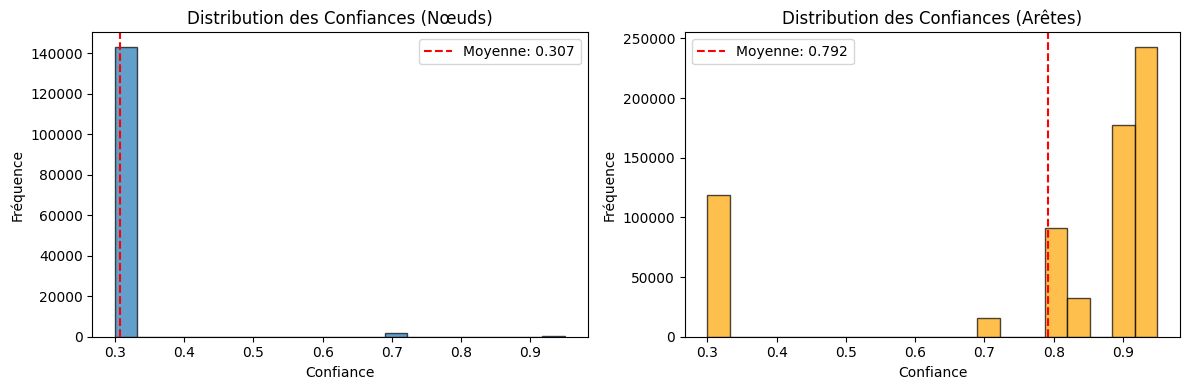

In [29]:
# ========================================
# VISUALISATION SIMPLE
# ========================================

print("\n=== PRÉPARATION VISUALISATION ===")

# Histogramme des confiances
if len(confidences) > 0:
    plt.figure(figsize=(12, 4))
    
    # Subplot 1: Confiances des nœuds
    plt.subplot(1, 2, 1)
    plt.hist(confidences, bins=20, alpha=0.7, edgecolor='black')
    plt.title('Distribution des Confiances (Nœuds)')
    plt.xlabel('Confiance')
    plt.ylabel('Fréquence')
    plt.axvline(np.mean(confidences), color='red', linestyle='--', 
                label=f'Moyenne: {np.mean(confidences):.3f}')
    plt.legend()
    
    # Subplot 2: Confiances des arêtes (si disponibles)
    if len(edge_confidences) > 0:
        plt.subplot(1, 2, 2)
        plt.hist(edge_confidences, bins=20, alpha=0.7, edgecolor='black', color='orange')
        plt.title('Distribution des Confiances (Arêtes)')
        plt.xlabel('Confiance')
        plt.ylabel('Fréquence')
        plt.axvline(np.mean(edge_confidences), color='red', linestyle='--',
                    label=f'Moyenne: {np.mean(edge_confidences):.3f}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()


In [30]:
# Graphique de sparsité par type d'entité
if len(entity_types) > 1:
    print("\nSparsité par type d'entité:")
    
    sparsity_by_type = {}
    for node_id, attrs in loaded_data.nodes(data=True):
        if 'embedding' in attrs:
            entity_type = attrs.get('entity_type', 'unknown')
            embedding = attrs['embedding']
            sparsity = np.mean(embedding == 0)
            
            if entity_type not in sparsity_by_type:
                sparsity_by_type[entity_type] = []
            sparsity_by_type[entity_type].append(sparsity)
    
    # Afficher les moyennes
    for entity_type, sparsities in sparsity_by_type.items():
        avg_sparsity = np.mean(sparsities)
        print(f"  {entity_type}: {avg_sparsity:.3f} ({len(sparsities)} échantillons)")



Sparsité par type d'entité:
  TEXT: 0.918 (143144 échantillons)
  IP_ADDRESS: 0.090 (441 échantillons)
  HTTP_METHOD: 0.212 (5 échantillons)
  HTTP_PATH: 0.280 (986 échantillons)
  TELECOM_CODE: 0.104 (617 échantillons)
  TOKEN_TYPE: 0.109 (1 échantillons)
  SERVICE_5G: 0.160 (19 échantillons)
  UUID: 0.002 (109 échantillons)
  NF_TYPE: 0.191 (10 échantillons)
  STATUS: 0.172 (1 échantillons)
  FQDN: 0.148 (8 échantillons)


In [31]:
print("\n ANALYSE TERMINÉE")
print("La vectorisation semble fonctionnelle avec:")
print(f"  - {nodes_with_embedding:,} nœuds vectorisés")
print(f"  - {edges_with_embedding:,} arêtes vectorisées") 
print(f"  - {len(entity_types)} types d'entités détectés")
print(f"  - Confiance moyenne: {np.mean(confidences):.3f}")


 ANALYSE TERMINÉE
La vectorisation semble fonctionnelle avec:
  - 145,341 nœuds vectorisés
  - 678,839 arêtes vectorisées
  - 11 types d'entités détectés
  - Confiance moyenne: 0.307
